# Online Shoppers Intention
The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top ecommerce site. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. This dataset has very few missing values and all features of the dataset are relevant to the purchasing intention based on inference.)


## Problem Statement
- The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website.
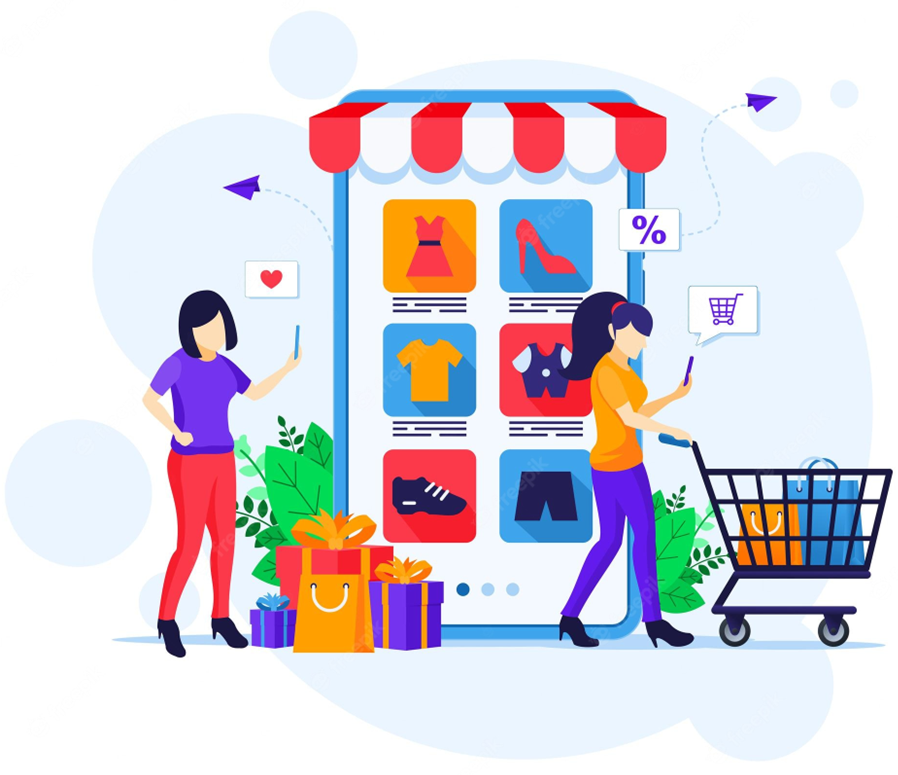

In [1]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime for datetime manipulation 
from datetime import datetime as dt
import datetime as dt 
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator() # every year
months = mdates.MonthLocator() # every month
months_fmt = mdates.DateFormatter('%m')

In [2]:
# read csv file 'online_shopper'
ds = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Data Science and ML\10Alytics\Internship\online_shoppers_intention.csv')
ds

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
ds.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
ds.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


### Data Inspection and Manipulation

In [5]:
# no. of rows and columns
ds.shape

(12330, 18)

In [6]:
# info about the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# check the columns in the data set
ds.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
# check missing values
ds.isna()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
ds.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<AxesSubplot:title={'center':'Visualizing missing values in the data set'}>

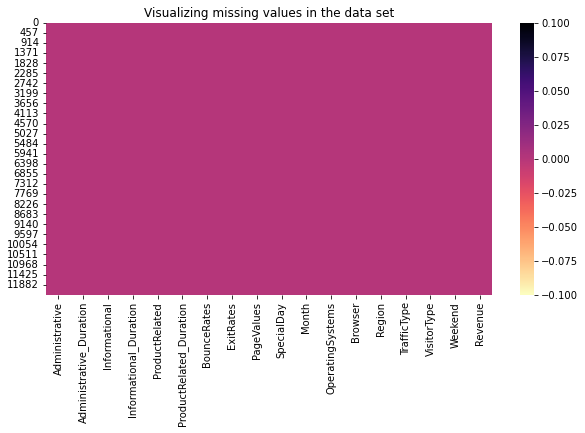

In [10]:
# Visualizing missing values
plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values in the data set')
sns.heatmap(ds.isnull(),  cbar = True, cmap = 'magma_r')

In [11]:
# the stastical descriptive analysis of the numerical data
ds.describe().astype('int')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
mean,2,80,0,34,31,1194,0,0,5,0,2,2,3,4
std,3,176,1,140,44,1913,0,0,18,0,0,1,2,4
min,0,0,0,0,0,0,0,0,0,0,1,1,1,1
25%,0,0,0,0,7,184,0,0,0,0,2,2,1,2
50%,1,7,0,0,18,598,0,0,0,0,2,2,3,2
75%,4,93,0,0,38,1464,0,0,0,0,3,2,4,4
max,27,3398,24,2549,705,63973,0,0,361,1,8,13,9,20


### Feature Description
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.




### Exploratory Data Analysis: Relationship, insights and Visualizations
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis
- generating insight on a feature(variable)

In [12]:
ds.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
ds.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [14]:
ds.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [15]:
# Total revenue- no. of completed purchases
ds_rev = ds['Revenue'].sum()
ds_rev

1908

### Observation
- There are 1908 completed no. purchases by the online shoppers

### Administrative Analysis

In [16]:
# total no. of pages visited by the users on the administrative page
ds['Administrative'].sum()

28546

In [17]:
# maximum no. of pages visited by the users on the administrative page
ds['Administrative'].max()

27

In [18]:
# the least no. of pages visited by the users on the administrative page
ds['Administrative'].min()

0

In [19]:
# the average no. of pages visited by the users on the administrative page
round(ds['Administrative'].mean(), )

2

In [20]:
# maximum no. of duration spent by the users on the administrative page
max_dur = (ds['Administrative_Duration'].max())/60
round(max_dur, )

57

In [21]:
# the average no. of duration spent by the users on the administrative page
avg_dur = (ds['Administrative_Duration'].mean())/60
round(avg_dur, )

1

In [22]:
# total no. of duration spent by the users on the administrative page
tot_dur = (ds['Administrative_Duration'].sum())/3600
round(tot_dur, )

277

###  Observations
- it is observed that the total number of administrative pages is 2856
- the maximum number of administrative pages is 27 compare to the average number of 2 visited by the online shoppers, which shows a user is like to check two administrative pages on average with a duration of 1hour.
- Users spent 277 hours on the administrative page during their online shopping while the maximum duration is 57mins.




### Product Analysis

In [23]:
# total no. of product pages visited by the user
tot_pro = ds['ProductRelated'].sum()
tot_pro

391249

In [24]:
# max no. of product pages visited by the user
max_pro = ds['ProductRelated'].max()
max_pro

705

In [25]:
# avg no. of product pages visited by the user
avg_pro = ds['ProductRelated'].mean()
round(avg_pro, )

32

In [26]:
# the total duration spent on the product pages
tot_dur = (ds['ProductRelated_Duration'].sum())/3600
round(tot_dur, )

4092

In [27]:
# the maximum duration spent on the product pages by the users during online shopping.
max_dur = (ds['ProductRelated_Duration'].max())/3600
round(max_dur, )

18

In [28]:
# the average duration spent by the users during their online shopping 
avg_dur = (ds['ProductRelated_Duration'].mean())/60
round(avg_dur, )

20

###  Observations
- come to think of it, users perused 391249 producted related pages during their online shopping sprey.
- we have that the maximum number of pages visited by the user is 705 compared to the average of 32 by users.
- It is observed that users spent more hours on the product related pages compared to every other pages on their website. A total duration of 4092 was spent by the online shoppers.
- it is noticed that the average duration spent on the product related pages by the users during their online shopping is 20mins compared to the 18mins maximum time spent on the product related pages by the users.

### Informational Analysis

In [29]:
# total no. of informational pages visited by the user
tot_info = ds['Informational'].sum()
tot_info

6209

In [30]:
# maximum no. of informational pages visited by the user
max_info = ds['Informational'].max()
max_info

24

In [31]:
# average no. of informational pages visited by the user
avg_info = ds['Informational'].mean()
round(avg_info, 2)

0.5

In [32]:
# total duration spent on the informational pages visited by the user
tot_info_dur = (ds['Informational_Duration'].sum())/3600
round(tot_info_dur, 2)

118.07

In [33]:
# average duration spent on the informational pages visited by the user
avg_info_dur = (ds['Informational_Duration'].mean())/60
round(avg_info_dur, 1)

0.6

In [34]:
# maximum duration spent on the informational pages visited by the user
max_info_dur = (ds['Informational_Duration'].max())/60
round(max_info_dur, 1)

42.5

### Observations
- the total number of informational pages visited by the user is 6209 compared to administrative and producted related pages
- the maximum number of informational pages visited by the user is 24 in comparision to the product related pages and administrative pages
- on average of approximaately 1 page visited by user on the information pages during their online shopping
- A total of approximately 118 hours was spent on the informational pages by the users during their online shopping, with average of 0.6 minutes and on a maximum duration of approxomately 43 mins as compare to the duration spent on both the administration and product related pages respectively.

In [35]:
ds.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [36]:
# total browser opened and used across all the pages
ds.Browser.sum()

29063

In [37]:
# Browsers category used across the features of the data set
ds.groupby('Browser').sum().astype(int)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Region,TrafficType,Weekend,Revenue
Browser,,,,,,,,,,,,,,,
1,5376,199152,1200,72321,60086,2215789,64,115,13556,127,3401,7112,8365,704,365
2,19345,661983,4327,304306,276985,10445959,170,333,45511,507,18568,25268,34108,1785,1223
3,141,6732,28,2117,1724,74907,3,6,271,9,314,295,453,33,5
4,1460,50728,268,18334,22411,853353,12,29,4948,42,1471,2416,2285,118,130
5,1056,33505,183,12341,14633,548554,9,19,3726,30,1001,1451,1533,94,86
6,334,14337,72,6757,5198,207396,3,7,923,17,367,500,648,32,20
7,137,2609,23,2379,1259,46329,1,2,169,2,111,172,194,16,6
8,189,8307,19,512,2433,84241,4,7,706,7,135,455,897,45,21
9,2,390,0,0,10,1169,0,0,0,0,3,9,2,0,0


### Bivariate Analysis
- generating insights by comparing two fearures to see how correlated they are.

In [38]:
# Administrative pages by month 
ds_mon = ds['Administrative'].groupby(ds.Month).sum().sort_index(ascending = True)[:10]
ds_mon

Month
Aug     1358
Dec     3793
Feb      100
Jul     1047
June     655
Mar     3600
May     6610
Nov     7847
Oct     2042
Sep     1494
Name: Administrative, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Administrative'>

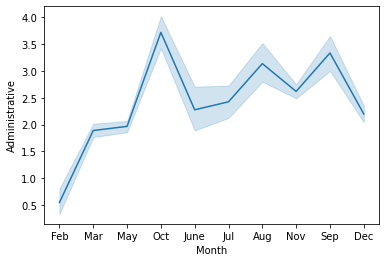

In [39]:
# admin pages trend
sns.lineplot(x = 'Month', y = 'Administrative', data = ds, sort = False)

In [40]:
# Administrative duration spent by month 
dur_mon = ds['Administrative_Duration'].groupby(ds.Month).sum().sort_index(ascending = True)[:10]
round(dur_mon, )

Month
Aug      46209.0
Dec     135799.0
Feb       3105.0
Jul      34074.0
June     17029.0
Mar     135838.0
May     233703.0
Nov     272618.0
Oct      69141.0
Sep      48978.0
Name: Administrative_Duration, dtype: float64

<AxesSubplot:ylabel='Month'>

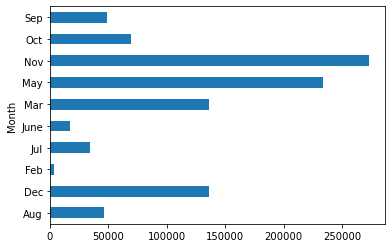

In [41]:
dur_mon.plot.barh()

In [42]:
# administrative by bounce rates
admin_bounce = round(ds['BounceRates'].groupby(ds.Administrative).sum().sort_values(ascending = False), 2)
admin_bounce

Administrative
0     223.57
1      14.31
2       9.37
3       6.46
4       4.94
5       4.03
6       2.64
7       2.00
8       1.65
9       1.34
10      0.87
11      0.57
12      0.57
13      0.32
14      0.26
15      0.23
16      0.14
17      0.11
18      0.07
24      0.04
22      0.04
23      0.02
19      0.02
20      0.01
26      0.01
21      0.01
27      0.00
Name: BounceRates, dtype: float64

<AxesSubplot:xlabel='Administrative'>

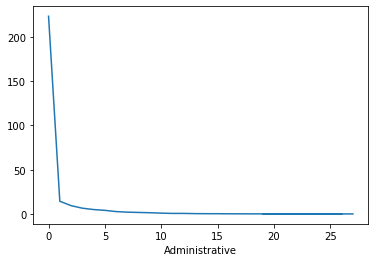

In [43]:
admin_bounce.plot()

In [44]:
# administrative pages spent by weekend
admin_weekend = ds['Administrative'].groupby(ds.Weekend).sum()
admin_weekend

Weekend
False    21449
True      7097
Name: Administrative, dtype: int64

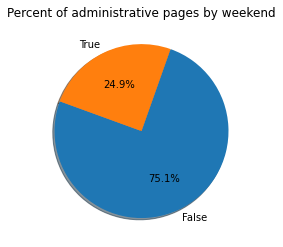

In [45]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(admin_weekend, labels = admin_weekend.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Percent of administrative pages by weekend')

plt.show()

In [46]:
# administrative durations spent by weekend
admin_dur_weekend = round((ds['Administrative_Duration'].groupby(ds.Weekend).sum())/3600)
admin_dur_weekend

Weekend
False    209.0
True      68.0
Name: Administrative_Duration, dtype: float64

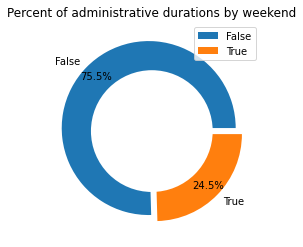

In [47]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.05, 0.05)
plt.pie(admin_dur_weekend, labels = admin_dur_weekend.index  , colors = colors, 
        autopct = '%1.1f%%', explode=explode, pctdistance = 0.85)
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels = admin_dur_weekend.index, loc = 'upper right')

plt.title('Percent of administrative durations by weekend')

plt.show()

### Observation
- it shows that 24.9% of users prefer to visit the administrative pages during the week days compare to weekend

In [48]:
ds.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [49]:
# administrative pages by revenue
admin_rev = ds['Administrative'].groupby(ds.Revenue).sum()
admin_rev

Revenue
False    22071
True      6475
Name: Administrative, dtype: int64

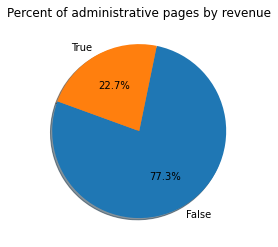

In [50]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(admin_rev, labels = admin_rev.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Percent of administrative pages by revenue')

plt.show()

### Observation
- it shows that approximately 77% of the users that visited the administrative pages failed to make purchases while 23% did make purchase at the end of their browsing and generated revenue for the online store owner.

In [51]:
# administrative pages by visitors type
admin_vis = ds['Administrative'].groupby(ds.VisitorType).sum()
admin_vis

VisitorType
New_Visitor           4323
Other                  125
Returning_Visitor    24098
Name: Administrative, dtype: int64

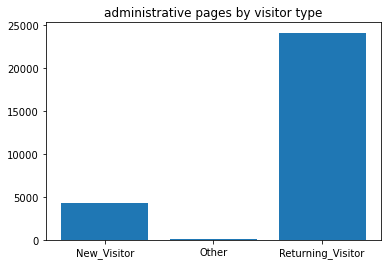

In [52]:
# visualize administrative pages by visitor type
plt.bar(x = admin_vis.index, height = admin_vis)
plt.title('administrative pages by visitor type')
plt.show()

In [53]:
# administrative duration spent by visitors type
admin_dur_vis = (ds['Administrative_Duration'].groupby(ds.VisitorType).sum())/3600
admin_dur_vis

VisitorType
New_Visitor           43.249380
Other                  1.480313
Returning_Visitor    232.074049
Name: Administrative_Duration, dtype: float64

<AxesSubplot:ylabel='VisitorType'>

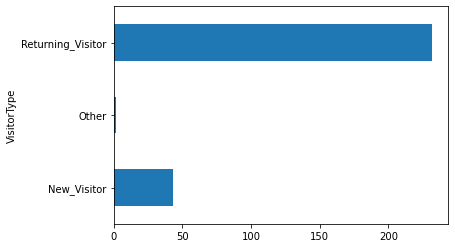

In [54]:
admin_dur_vis.plot.barh()

### Observation
- it shows that returning visitors visited the administrative pages the most with a total of about 24098 and spent 232 hours compare to the new visitors and the others respectively.

In [55]:
# administrative pages by traffic type
admin_traf = ds['Administrative'].groupby(ds.TrafficType).sum()
admin_traf

TrafficType
1      4682
2     11307
3      3698
4      2511
5       906
6       903
7       116
8       987
9        82
10     1051
11      435
12        0
13     1317
14       44
15       52
16        9
17        0
18       21
19       24
20      401
Name: Administrative, dtype: int64

<AxesSubplot:xlabel='TrafficType'>

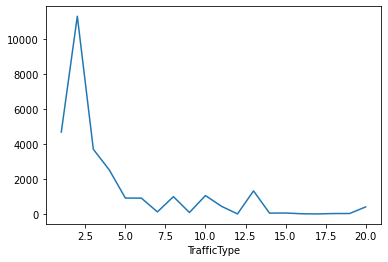

In [56]:
admin_traf.plot()

In [57]:
# administrative pages by region
admin_reg = ds['Administrative'].groupby(ds.Region).sum()
admin_reg

Region
1    10857
2     2731
3     5878
4     2722
5      783
6     1655
7     1792
8     1077
9     1051
Name: Administrative, dtype: int64

<AxesSubplot:xlabel='Region'>

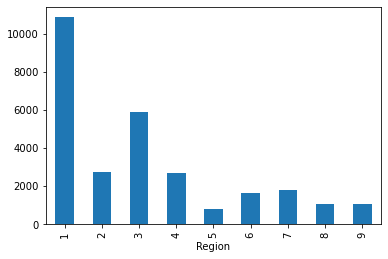

In [58]:
admin_reg.plot.bar()

In [59]:
# administrative duration spent by region
admin_dur_reg = (ds['Administrative_Duration'].groupby(ds.Region).sum())/3600
admin_dur_reg

Region
1    105.754789
2     27.415994
3     55.426318
4     27.265878
5      7.790690
6     15.337827
7     16.651510
8     10.799555
9     10.361179
Name: Administrative_Duration, dtype: float64

<AxesSubplot:xlabel='Region'>

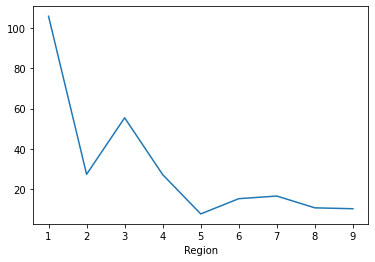

In [60]:
admin_dur_reg.plot()

### Observation
- it is seen that most of the users that spent more time browsing on the administrative pages were mostly from region 1 with a total of approximately 106, followed by region 3 with 55 in comparison to other regions respectively.
- from the above insights it is observed that Traffic 2 has the highest number of users visited the administrative page with a total of 11307 compare to every other traffic types.


#### - Product Analysis

In [61]:
ds.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [62]:
# the number of product page visited by month
pro_mon = ds['ProductRelated'].groupby(ds.Month).sum().sort_index(ascending = True)[:10]
pro_mon

Month
Aug      16566
Dec      48347
Feb       2058
Jul      15728
June     10387
Mar      37775
May      89105
Nov     138024
Oct      18428
Sep      14831
Name: ProductRelated, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='ProductRelated'>

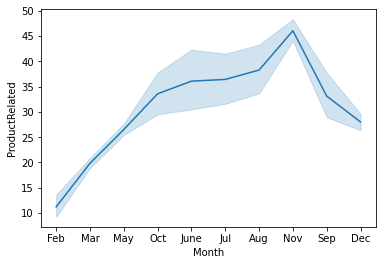

In [63]:
# product page trend
sns.lineplot(x = 'Month', y = 'ProductRelated', data = ds, sort = True)

In [64]:
# the number of product page visited by bounce rates
pro_bounce = ds['ProductRelated'].groupby(ds.BounceRates).sum().sort_index(ascending = True)[:5]
pro_bounce

BounceRates
0.000000    110066
0.000027       179
0.000034       187
0.000038       518
0.000039       310
             ...  
0.175000         4
0.176923        12
0.180000        17
0.183333         6
0.200000       960
Name: ProductRelated, Length: 1872, dtype: int64

<AxesSubplot:xlabel='BounceRates'>

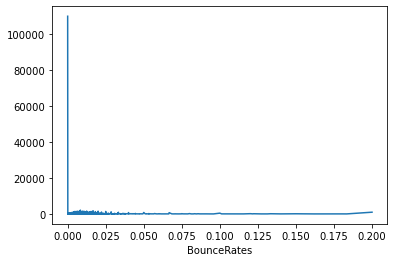

In [65]:
pro_bounce.plot()

In [66]:
#Top 5 total bounce rates by product related pages 
top5_pro = ds.groupby('ProductRelated').BounceRates.sum().head(5).astype(float).sort_values()
top5_pro

ProductRelated
0      3.730000
4     11.205397
3     15.567320
2     22.718056
1    107.353333
Name: BounceRates, dtype: float64

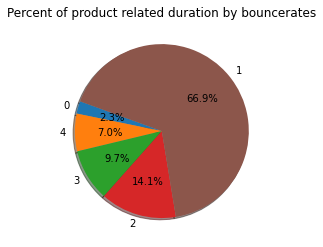

In [67]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(top5_pro, labels = top5_pro.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Percent of product related duration by bouncerates')

plt.show()

### Observation
- it is shown that 67 percent of online shoppers visited 1 product related page without trigerring any additional task compared to others.
- the product related pages recorded a total of 138024 in terms of how visitors visited the page in the month of November compared to every other months.

In [68]:
# the number of product page visited by month
pro_vtype = ds['ProductRelated'].groupby(ds.VisitorType).sum().sort_index(ascending = True)[:10]
pro_vtype

VisitorType
New_Visitor           30585
Other                  1060
Returning_Visitor    359604
Name: ProductRelated, dtype: int64

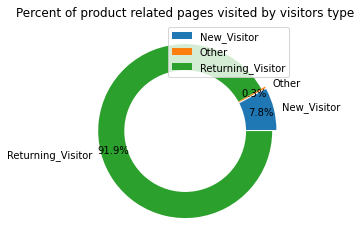

In [69]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.05, 0.05, 0)
plt.pie(pro_vtype, labels = pro_vtype.index  , colors = colors, 
        autopct = '%1.1f%%', explode=explode, pctdistance = 0.85)
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels = pro_vtype.index, loc = 'upper right')

plt.title('Percent of product related pages visited by visitors type')

plt.show()

### Observation
- it is observed that the month of November had the highest spike of about 138024 in the number of product related pages visited which was a result of the approximately 92% of the returning visitors browsing during their online shopping.

In [70]:
# product related pages by revenue 
prod_revenue = ds['ProductRelated'].groupby(ds.Revenue).sum()
prod_revenue

Revenue
False    299264
True      91985
Name: ProductRelated, dtype: int64

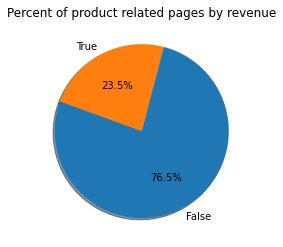

In [71]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(prod_revenue, labels = prod_revenue.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Percent of product related pages by revenue')

plt.show()

In [72]:
# product related duration by weekend 
prod_wknd = ds['ProductRelated_Duration'].groupby(ds.Weekend).sum().astype(int)/3600
prod_wknd

Weekend
False    3119.947778
True      972.057778
Name: ProductRelated_Duration, dtype: float64

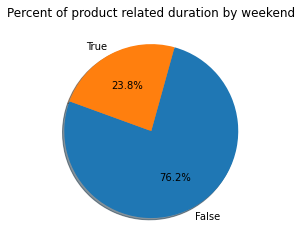

In [73]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(prod_wknd, labels = prod_wknd.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Percent of product related duration by weekend')

plt.show()

### Observation
- it is observed that approximately 24% of visitors on the product related pages are only able to make a complete purchase compare to approximately 77% who are not.
- A total of 972 hours was spent on weekend browsing the product related pages and approximately 3120 was spent on week days, that shows that vistors visited more on week days and completed transactions than weekends.

#### - Informational Analysis


In [74]:
ds.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [75]:
# the number of informational pages visited by month
info_mon = ds['Informational'].groupby(ds.Month).sum().sort_index(ascending = True)[:10]
info_mon

Month
Aug      235
Dec      885
Feb       16
Jul      223
June     162
Mar      802
May     1426
Nov     1938
Oct      268
Sep      254
Name: Informational, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Informational'>

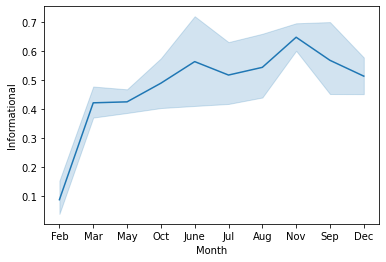

In [76]:
sns.lineplot(x = 'Month', y = 'Informational', data = ds, sort = True)

In [77]:
# the number of informational duration spent by month
info_dur_mon = ds['Informational_Duration'].groupby(ds.Month).sum().sort_index(ascending = True).astype(int)/3600
info_dur_mon

Month
Aug      4.271389
Dec     18.262500
Feb      0.121944
Jul      5.462222
June     1.635833
Mar     16.248333
May     25.382222
Nov     36.338056
Oct      5.896667
Sep      4.447222
Name: Informational_Duration, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Informational_Duration'>

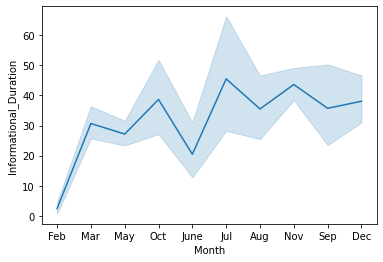

In [78]:
sns.lineplot(x = 'Month', y = 'Informational_Duration', data = ds, sort = True)

### Observation
- it is observed that approximately 36hours was spent browsing the informational page in the month of November with a total of 1938 compare to other months. 

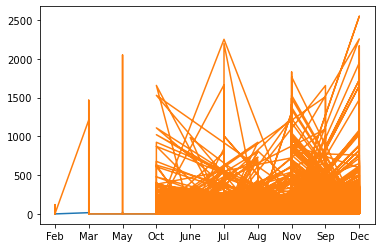

In [79]:
x = ds.Month
y = ds['Informational']
z = ds['Informational_Duration']
plt.plot(x, y)
plt.plot(x, z)
plt.show()

In [80]:
# the informational pages spent by bounce rate 
info_bounce = ds['Informational'].groupby(ds.BounceRates).sum().sort_index(ascending = True).astype(int)
info_bounce

BounceRates
0.000000    1665
0.000027       3
0.000034       2
0.000038       0
0.000039       1
            ... 
0.175000       0
0.176923       0
0.180000       0
0.183333       0
0.200000       6
Name: Informational, Length: 1872, dtype: int32

In [81]:
#Top 5 total bounce rates by informational pages 
top5_info = ds.groupby('Informational').BounceRates.max().head(5).astype(float).sort_values()
top5_info

Informational
4    0.057801
3    0.070588
2    0.100000
0    0.200000
1    0.200000
Name: BounceRates, dtype: float64

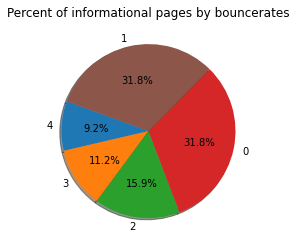

In [82]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(top5_info, labels = top5_info.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Percent of informational pages by bouncerates')

plt.show()

In [83]:
# the number of informational page visited by weekend
info_weekend = ds['Informational'].groupby(ds.Weekend).sum()
info_weekend

Weekend
False    4528
True     1681
Name: Informational, dtype: int64

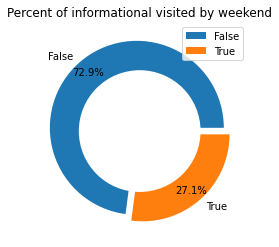

In [84]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.05, 0.05)
plt.pie(info_weekend, labels = info_weekend.index  , colors = colors, 
        autopct = '%1.1f%%', explode=explode, pctdistance = 0.85)
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels = info_weekend.index, loc = 'upper right')

plt.title('Percent of informational visited by weekend')

plt.show()

### Observation
- it is observed that approximately 73% users visited the informational pages during the week while approximately 27% visited during weekend.

### Multivariate Analysis
- generating insights using three or more features.

In [85]:
#the top 5 most visited pages by the users during their online shopping
pages= ds.sort_values(by = ['Administrative', 'Informational', 'ProductRelated'], ascending = False)[['Administrative', 'Informational', 'ProductRelated']][:5]
pages

,Administrative,Informational,ProductRelated
8308,27,2,584
12178,26,9,183
5597,24,6,189
4937,24,6,178
1509,24,5,34


<AxesSubplot:>

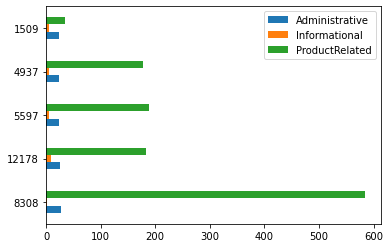

In [86]:
pages.plot.barh()

In [87]:
# the correlation between features of the data set
ds.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


<AxesSubplot:>

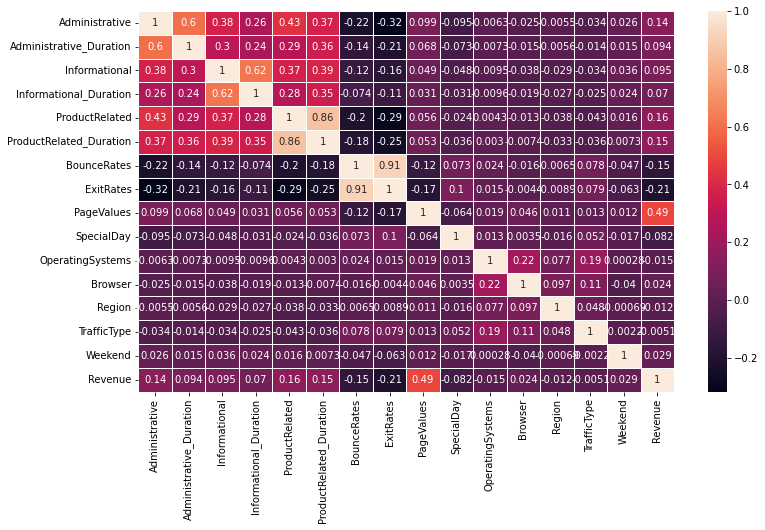

In [88]:
corel = ds.corr()
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corel, linewidths = 0.5, annot = True)

In [89]:
# the total browser used to view each page
total_browser = ds.groupby('Browser').sum().sort_values(by = ['Administrative', 'Informational', 'ProductRelated'], ascending = False)[['Administrative', 'Informational', 'ProductRelated']]
total_browser

,Administrative,Informational,ProductRelated
Browser,,,
2,19345,4327,276985
1,5376,1200,60086
4,1460,268,22411
5,1056,183,14633
10,376,72,5357
6,334,72,5198
8,189,19,2433
3,141,28,1724
7,137,23,1259


<AxesSubplot:xlabel='Browser'>

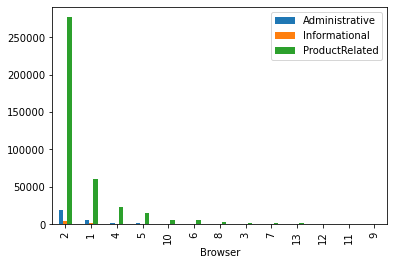

In [90]:
total_browser.plot.bar()

#### - Linear regression analysis


<AxesSubplot:xlabel='SpecialDay', ylabel='Revenue'>

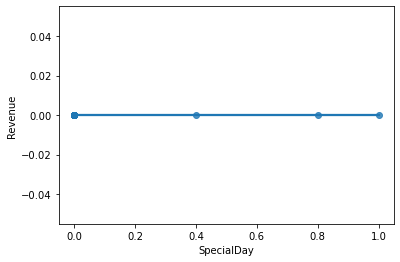

In [91]:
# simple regression of special day and Revenue
simple_lin_reg = ds[['SpecialDay', 'Revenue']].sample(15, random_state = 2)
# regression plot
sns.regplot(x = 'SpecialDay', y = 'Revenue', data = simple_lin_reg)

### Observation
- user 8308 visited the administrative, informational and product related pages the most with a total of 27, 2 and	584 respectively compared to the other users.
- it is observed from the correlation and the heatmap that there was a highly positive correlation between product related pages and product related duration, the bouncerates and the exit rates, and also the revenue has a high positive correlation to the page values where it shows most of the eCommerce transactions was completed.
- Browser 2 has the most user experience with a total of 19345,	4327 and 276985 on the Administrative,	Informational and ProductRelated pages respectively compared to all other browsers.
- from the linear regression above, there was a slight positve correlation between special days and revenue. it means that there were a bit positive increase in completed transactions close to the special days than every other days.

## Feature Selections and Engineering
- Encoding categorical variables
- Create new features from existing features where necessary, depending on insights from your EDA

In [92]:
ds.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [93]:
# Create a function that properly labels revenue, weekend and visitors type
def revenue(x):
    if x == True:
        return 1
    else:
        return 0
    
def weekend(x):
    if x == True:
        return 1
    else:
        return 0
    
# Create a new column
ds['reveneu_new'] = ds['Revenue'].apply(revenue)

ds['weekend_new'] = ds['Weekend'].apply(weekend)


In [94]:
# drop columns: Revenue and Weekend
ds = ds.drop(['Revenue', 'Weekend'], axis = 1)
ds.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,reveneu_new,weekend_new
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,0,1


In [95]:
# select categorical variables
# replace pass with your code

categorical = [ 'Month','VisitorType']

In [96]:
# One hot encoding using get_dummies
categories_dummies = pd.get_dummies(ds[categorical])

In [97]:
# view what you have done
categories_dummies.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [98]:
ds[categorical]

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor
...,...,...
12325,Dec,Returning_Visitor
12326,Nov,Returning_Visitor
12327,Nov,Returning_Visitor
12328,Nov,Returning_Visitor


In [99]:
# join the encoded variables back to the main dataframe using pd.concat()
# pass both census_data and categories_dummies as a list of their names
# pop out documentation for pd.concat() to clarify

ds = pd.concat([ds, categories_dummies], axis=1)

# check what you have done
print(ds.shape)
ds.head()

(12330, 31)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
# remove the initial categorical columns now that we have encoded them
# use the list called categorical do delete all the initially selected columns at once
# replace pass in the code below

ds = ds.drop(categorical, axis = 1)

In [101]:
print(ds.shape)
ds.head()

(12330, 29)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


### Choose your target
TODO:

set y as revenue_new which is the target. Your code will be similar to dataframe.revenue_new
set X as data except the Revenue column. 

You can use drop() to remove revenue_new column target when doing this assignment. Your code will be similar to data.drop(revenue_new, axis=1)

In [102]:
#your code here:
y = ds.reveneu_new
X = ds.drop('reveneu_new', axis=1)

## Create train and test datasets

Split your data set into a train and test set. Your test set will be used to evaluate the trained model.

In [110]:
#use train_test_split to divide the dataset into train and test datasets
from sklearn.model_selection import train_test_split

In [112]:
#split into training and validation sets using a 20% split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Preparing the models

In [113]:
#import the libraries we will need
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm

# ML Metrics
from sklearn.metrics import accuracy_score, classification_report

# Visualizations
import seaborn as sns

### Feature Scaling
- Scaling is done to normalize the features in the dataset into a finite range i.e between 0 and 1. Logistic regression expects data to be scaled

In [114]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

In [115]:
#data scaling steps for train data set
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [116]:
# TODO: initialize logistic regression
LR = LogisticRegression()

#TODO: initialize k neighbors
KN = KNeighborsClassifier()

#TODO: initialize decision tree
DC = DecisionTreeClassifier()

#TODO: initialize random forest
RF = RandomForestClassifier()

#create list of your model names
models = [LR, KN, DC, RF]

In [117]:
def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
#create function to train a model and evaluate accuracy
def trainer(model, X_train, y_train, X_valid, y_valid):
    #fit your model
    model.fit(X_train, y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction, y_valid)))
    print(classification_report(prediction, y_valid)) 
    plot_confusion_matrix(y_valid,prediction)


For LogisticRegression, Accuracy score is 0.24736415247364152 

              precision    recall  f1-score   support

           0       0.10      0.95      0.18       210
           1       0.97      0.18      0.31      2256

    accuracy                           0.25      2466
   macro avg       0.54      0.56      0.24      2466
weighted avg       0.90      0.25      0.30      2466



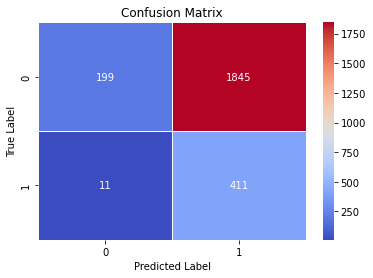


For KNeighborsClassifier, Accuracy score is 0.8215733982157339 

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2446
           1       0.00      0.05      0.00        20

    accuracy                           0.82      2466
   macro avg       0.50      0.44      0.45      2466
weighted avg       0.98      0.82      0.89      2466



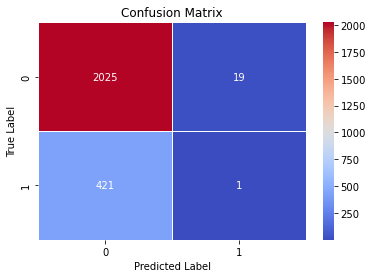


For DecisionTreeClassifier, Accuracy score is 0.37550689375506896 

              precision    recall  f1-score   support

           0       0.33      0.80      0.47       846
           1       0.59      0.15      0.25      1620

    accuracy                           0.38      2466
   macro avg       0.46      0.48      0.36      2466
weighted avg       0.50      0.38      0.32      2466



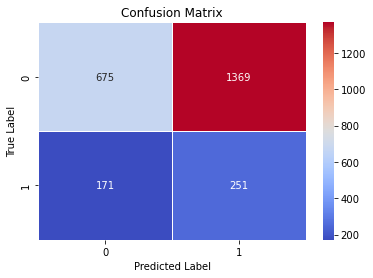


For RandomForestClassifier, Accuracy score is 0.8333333333333334 

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2445
           1       0.04      0.76      0.07        21

    accuracy                           0.83      2466
   macro avg       0.52      0.80      0.49      2466
weighted avg       0.99      0.83      0.90      2466



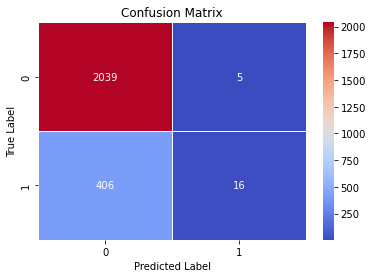

In [120]:
#loop through each model, training in the process
for model in models:
    trainer(model, X_train,y_train, X_valid,y_valid)    

### Inspect Feature Importances

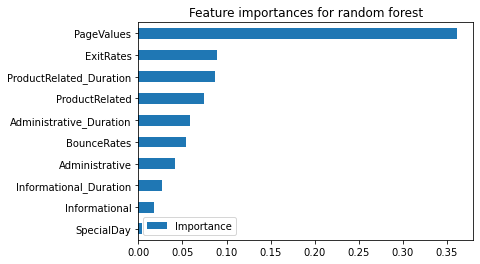

In [122]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [123]:
# get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['SpecialDay', 'Informational', 'Informational_Duration',
       'Administrative', 'BounceRates', 'Administrative_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'ExitRates',
       'PageValues'], dtype=object)

In [124]:
ds.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'reveneu_new',
       'weekend_new', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

### A Bit of Feature Selection

In [126]:
#create a new X train with only 10 features
X_train2 = X_train[[ 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb']]
X_train2.head(2)

,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb
2509,-0.137908,-0.210867,1.598193,-0.268323,-0.400076,-0.083316,0.411598,-0.190948,-0.405008,-0.125103
11116,-0.137908,4.454108,-0.898045,-0.516005,-0.400076,-0.083316,0.411598,-0.190948,2.469089,-0.125103


In [127]:
#create a new X_valid with only 10 features so we can predict on them
X_valid2 = X_valid[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb']]

In [128]:
# train and predict
RF.fit(X_train2, y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2, y_valid))

0.8288726682887266


## Evaluating Performance with Cross Validation

In cross validation, the model splits the training data into multiple blocks. Using 1 block as test set for each training iteration, it trains the other blocks and validates against the test data.

This gives you an idea of how the model will perform when it sees new data in the real world that it hasn't seen before.


In [131]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [132]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))
    

In [133]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train2, y_train)
    

Accuracy: 0.849
Accuracy: 0.823
Accuracy: 0.834
Accuracy: 0.835


In [134]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    # report performance
    print('Precision: %.3f' % (mean(scores)))
  

In [135]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train2, y_train)

Precision: 0.000
Precision: 0.234
Precision: 0.248
Precision: 0.250


In [136]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    # report performance
    print('Recall: %.3f' % (mean(scores)))
  

In [137]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train2, y_train)

Recall: 0.000
Recall: 0.074
Recall: 0.047
Recall: 0.041


### Summary
- It is observed that random forest classifier has the best accuracy performance of approximately 84% with a recall of 76% for our target or true label(1) and a precision of about 4% with f1_score of 7% compared to every other models that was used to train our data set.
- A bit of feature selection was done and our dataset was retrained on the random forest classifier used to train our data se and the accuracy was approximately 83%, that shows that the accuracy was close to the accuracy gotten previously on the trained model to predict close to the true label or target, which is the online shoppers intention represented by the revenue column.
- Furthermore, a k-cross validation was done to evaluate the performance of the best trained model to see if it can be generalized on a new data set when introduced, and we saw that it was approximately 84% accuratley predicted with a precision of 25% and a recall of 4% respectively.

### Conclusion
- It is observed that random forest model classifier is the overall best for training our data set to accurately predict the online shoppers intention with a high recall of 76%; which is a good metric to help determine if the online shoppers will intend to shop on the website after browsing through all the pages.
- It also shows that the model can fit and be trained on a new data set without overfitting or underfitting.
- This machine learning model can be deployed with the website API using Flask or Kubernetes for deployment.